In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor,  VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
import warnings
# %matplotlib notebook

## Load Data for cleaning and Exploration
This project is aimed at predicting the Naira price of cars in Nigeria,
Dataset from **Kaggle**

In [2]:
df = pd.read_csv('car_prices.csv')
df

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,C4Ly76wwazrtbYRAWkTnv2Q5,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported,SUV,Automatic,All Wheel,5.0,4.0,NaN,Plateau
3718,jPA7XlJJxdwpZStlurumw59q,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered,SUV,ML 320,All Wheel,5.0,6.0,215.0,NaN
3719,g5szhuHeXu2djH1Z2be22G7E,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered,Sedan,LE 4dr Sedan (2.2L 4cyl 4A),Front,5.0,4.0,136.0,RIVERS
3720,mdZMNQK7Zez0cSS67Q9Quhzr,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

car_id                    0
price                     0
fuel type                 1
gear type                 2
Make                      0
Model                     0
Year of manufacture       0
Colour                    5
Condition                 0
Mileage                  59
Engine Size              61
Selling Condition         0
Bought Condition          0
car                    1955
Trim                   2843
Drivetrain             2884
Seats                  2934
Number of Cylinders    2896
Horse Power            2967
Registered city        1821
dtype: int64

In [4]:
df.columns

Index(['car_id', 'price', 'fuel type', 'gear type', 'Make', 'Model',
       'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size',
       'Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'],
      dtype='object')

In [4]:
null_columns = ['car_id','car', 'Trim', 'Drivetrain', 'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city']

In [5]:
df = df.drop(columns=null_columns)
df

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition
0,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered
1,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported
2,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported
3,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported
4,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered
...,...,...,...,...,...,...,...,...,...,...,...,...
3717,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported
3718,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered
3719,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered
3720,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered


In [6]:
df.isnull().sum()

price                   0
fuel type               1
gear type               2
Make                    0
Model                   0
Year of manufacture     0
Colour                  5
Condition               0
Mileage                59
Engine Size            61
Selling Condition       0
Bought Condition        0
dtype: int64

In [7]:
df = df.dropna()
df

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition
0,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered
1,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported
2,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported
3,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported
4,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered
...,...,...,...,...,...,...,...,...,...,...,...,...
3717,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported
3718,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered
3719,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered
3720,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered


In [8]:
df.isnull().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 0 to 3721
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3600 non-null   int64  
 1   fuel type            3600 non-null   object 
 2   gear type            3600 non-null   object 
 3   Make                 3600 non-null   object 
 4   Model                3600 non-null   object 
 5   Year of manufacture  3600 non-null   int64  
 6   Colour               3600 non-null   object 
 7   Condition            3600 non-null   object 
 8   Mileage              3600 non-null   float64
 9   Engine Size          3600 non-null   float64
 10  Selling Condition    3600 non-null   object 
 11  Bought Condition     3600 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 365.6+ KB


In [9]:
df.describe()

,price,Year of manufacture,Mileage,Engine Size
count,3.600000e+03,3600.000000,3.600000e+03,3.600000e+03
mean,4.540438e+06,2008.163889,1.952695e+05,1.120777e+04
std,4.342391e+06,4.211461,1.402830e+05,1.100276e+05
min,5.500000e+05,1979.000000,1.000000e+00,1.800000e+02
25%,2.340000e+06,2006.000000,1.177440e+05,2.000000e+03
50%,3.360000e+06,2008.000000,1.761190e+05,2.500000e+03
75%,5.040000e+06,2011.000000,2.454910e+05,3.500000e+03
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06


Text(0.5, 0.98, 'Little Visualization of the Important Columns')

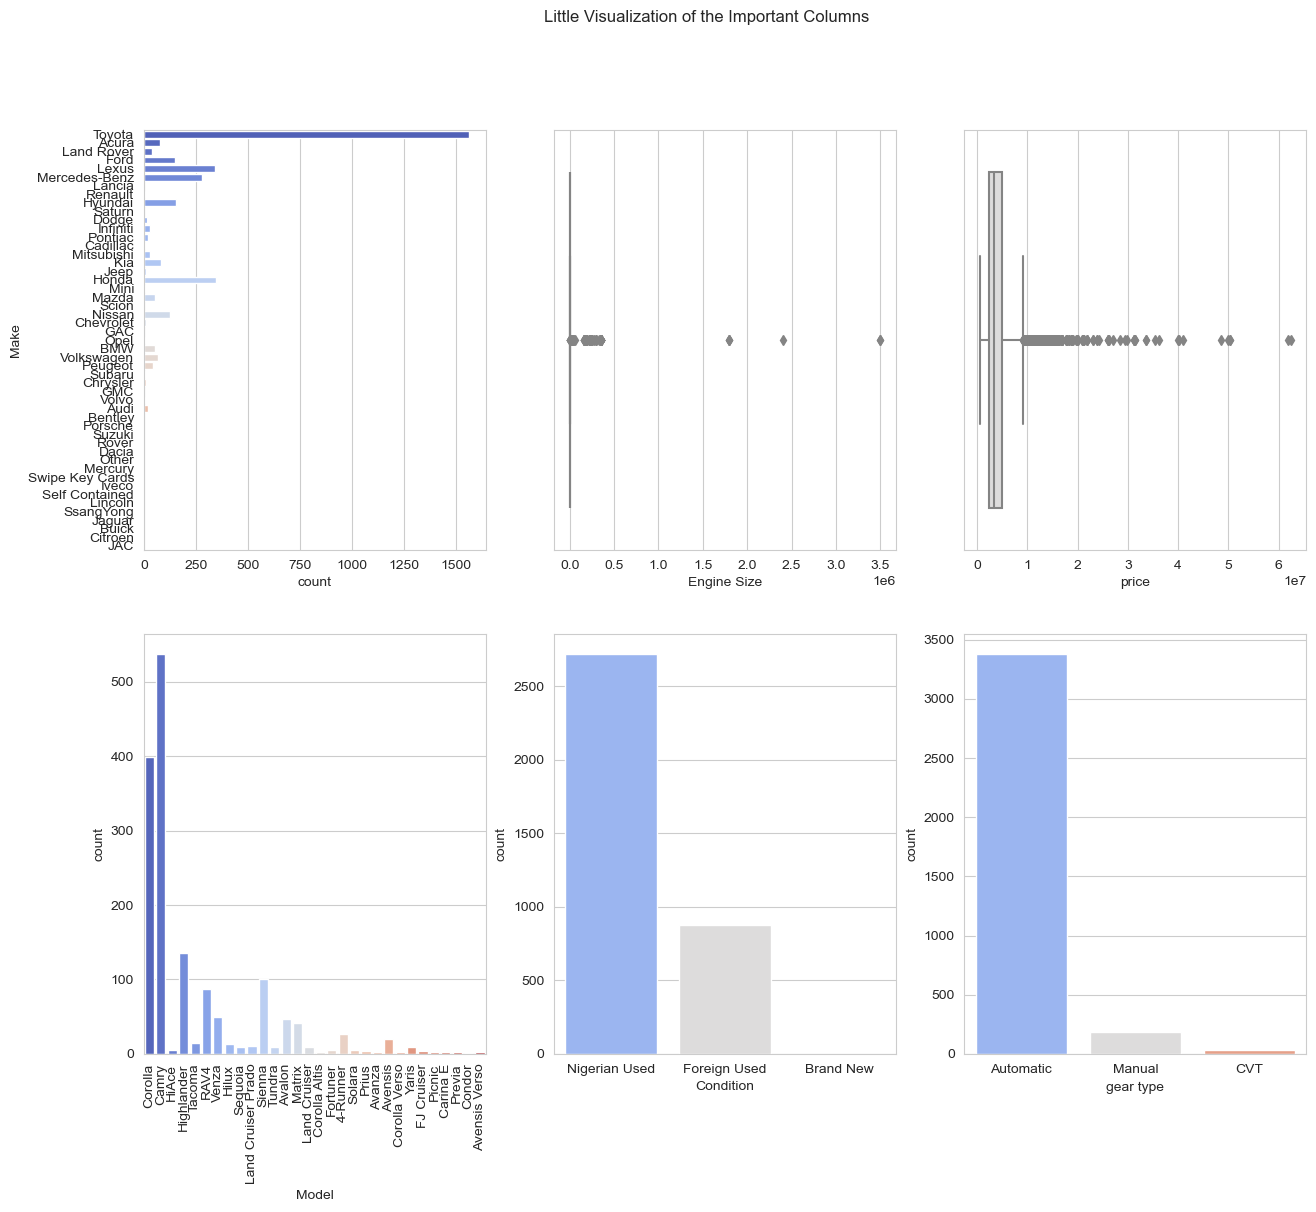

In [11]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(2,3, figsize = (15,12))
sns.countplot(ax = axs[0,0], y='Make', palette='coolwarm', data=df)
sns.boxplot(ax = axs[0,1], x='Engine Size', palette='coolwarm', data=df)
sns.boxplot(ax = axs[0,2], x='price', palette='coolwarm', data=df)
sns.countplot(ax = axs[1,0], x=df[df['Make'] == "Toyota"].Model, palette='coolwarm')
sns.countplot(ax = axs[1,1], x='Condition', palette='coolwarm', data=df)
sns.countplot(ax = axs[1,2], x='gear type', palette='coolwarm', data=df)
# axs[0,0].tick_params(axis="x", rotation=90)
axs[1,0].tick_params(axis="x", rotation=90)
# axs[1,0].x_label("Toyota Models")
fig.suptitle('Little Visualization of the Important Columns')

## From the Visualization above
It is clare that data is insufficient to predict price of all vehicles. Therefore, this model will only predict
price of Toyota cars since it has a significant amoun of data avilable for it.

In [12]:
df = df[df['Make'] == "Toyota"]
df

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition
0,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered
8,3885000,Petrol,Automatic,Toyota,Camry,2007,Gold,Foreign Used,159726.0,3000.0,Imported,Imported
10,3432000,Petrol,Automatic,Toyota,Camry,2011,Black,Nigerian Used,128048.0,2500.0,Registered,Imported
15,9135000,Petrol,Automatic,Toyota,HiAce,2011,Silver,Foreign Used,31234.0,2700.0,Imported,Imported
17,13520000,Petrol,Automatic,Toyota,Camry,2018,Black,Nigerian Used,68871.0,3500.0,Registered,Imported
...,...,...,...,...,...,...,...,...,...,...,...,...
3707,2100000,Petrol,Automatic,Toyota,Camry,2008,Black,Nigerian Used,121483.0,2400.0,Registered,Registered
3709,1690000,Petrol,Automatic,Toyota,Corolla,2003,Red,Nigerian Used,253425.0,1800.0,Registered,Registered
3717,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported
3719,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered


In [13]:
df = df[df['Engine Size']<0.5e6]

Text(0.5, 0.98, 'Little Visualization of the key columns')

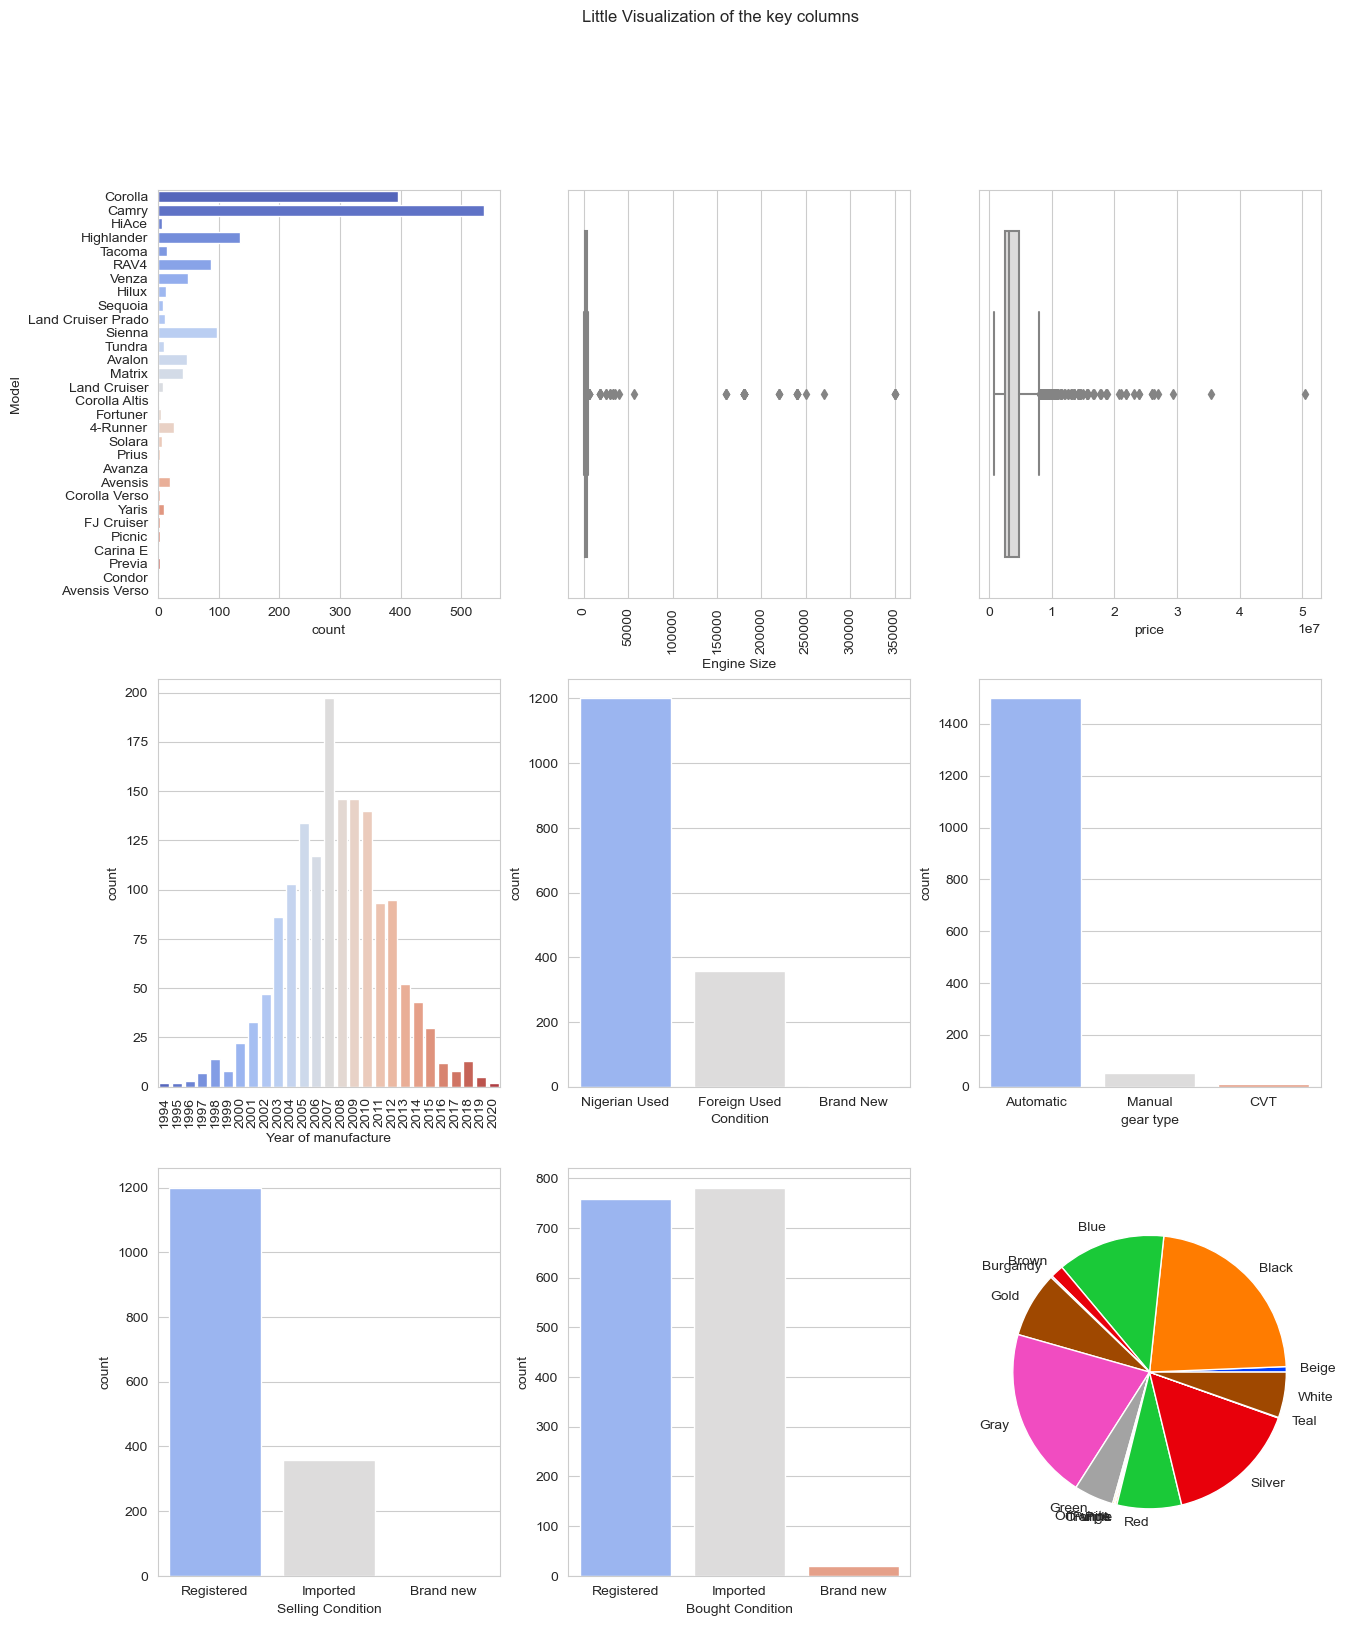

In [14]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(3,3, figsize = (15,18))
sns.countplot(ax = axs[0,0], y='Model', palette='coolwarm', data=df)
sns.boxplot(ax = axs[0,1], x='Engine Size', palette='coolwarm', data=df)
sns.boxplot(ax = axs[0,2], x='price', palette='coolwarm', data=df)
sns.countplot(ax = axs[1,0], x='Year of manufacture', palette='coolwarm', data=df)
sns.countplot(ax = axs[1,1], x='Condition', palette='coolwarm', data=df)
sns.countplot(ax = axs[1,2], x='gear type', palette='coolwarm', data=df)
sns.countplot(ax = axs[2,0], x='Selling Condition', palette='coolwarm', data=df)
sns.countplot(ax = axs[2,1], x='Bought Condition', palette='coolwarm', data=df)
df.groupby('Colour').size().plot(kind='pie', colors=sns.color_palette('bright'), ax = axs[2,2])
axs[0,1].tick_params(axis="x", rotation=90)
axs[1,0].tick_params(axis="x", rotation=90)
# axs[1,0].x_label("Toyota Models"), autopct='%.2f'
fig.suptitle('Little Visualization of the key columns')

Text(0.5, 1.01, 'Relationship between Engine size and Price of cars')

<Figure size 640x480 with 0 Axes>

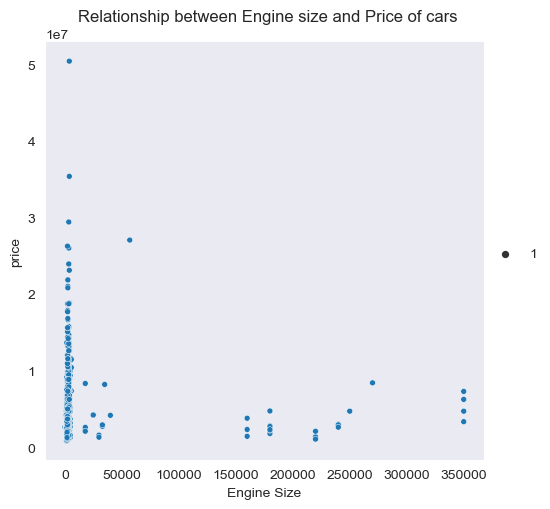

In [15]:
sns.set_style('dark')
plt.figure()
# g =sns.relplot(x='Engine Size', y='price', data=df, kind='line', row='Year of manufacture')
g =sns.relplot(x='Engine Size', y='price', data=df, kind='scatter', size=1)
g.fig.suptitle('Relationship between Engine size and Price of cars', y = 1.01)

Text(0.5, 1.01, 'Relationship between Milage and Price of cars')

<Figure size 640x480 with 0 Axes>

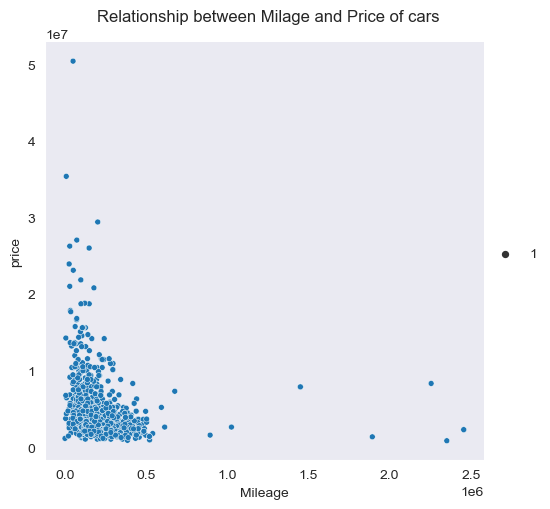

In [16]:
sns.set_style('dark')
plt.figure()
# g =sns.relplot(x='Engine Size', y='price', data=df, kind='line', col='Model', row='Year of manufacture')
g =sns.relplot(x='Mileage', y='price', data=df, kind='scatter', size=1)
g.fig.suptitle('Relationship between Milage and Price of cars', y = 1.01)

In [17]:
le = LabelEncoder()

In [18]:
df.columns

Index(['price', 'fuel type', 'gear type', 'Make', 'Model',
       'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size',
       'Selling Condition', 'Bought Condition'],
      dtype='object')

In [18]:
df['fuel_type_label'] = le.fit_transform(df['fuel type'])
df['gear_type_label'] = le.fit_transform(df['gear type'])
df['Make_label'] = le.fit_transform(df['Make'])
df['Model_label'] = le.fit_transform(df['Model'])
df['Year of manufacture_label'] = le.fit_transform(df['Year of manufacture'])
df['Colour_label'] = le.fit_transform(df['Colour'])
df['Condition_label'] = le.fit_transform(df['Condition'])
df['Selling Condition_label'] = le.fit_transform(df['Selling Condition'])
df['Bought Condition_label'] = le.fit_transform(df['Bought Condition'])
df

C:\Users\user\AppData\Local\Temp\ipykernel_11344\4055982123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type_label'] = le.fit_transform(df['fuel type'])
C:\Users\user\AppData\Local\Temp\ipykernel_11344\4055982123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gear_type_label'] = le.fit_transform(df['gear type'])
C:\Users\user\AppData\Local\Temp\ipykernel_11344\4055982123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,...,Bought Condition,fuel_type_label,gear_type_label,Make_label,Model_label,Year of manufacture_label,Colour_label,Condition_label,Selling Condition_label,Bought Condition_label
0,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,...,Registered,3,0,0,8,10,13,2,2,2
8,3885000,Petrol,Automatic,Toyota,Camry,2007,Gold,Foreign Used,159726.0,3000.0,...,Imported,3,0,0,5,13,5,1,1,1
10,3432000,Petrol,Automatic,Toyota,Camry,2011,Black,Nigerian Used,128048.0,2500.0,...,Imported,3,0,0,5,17,1,2,2,1
15,9135000,Petrol,Automatic,Toyota,HiAce,2011,Silver,Foreign Used,31234.0,2700.0,...,Imported,3,0,0,13,17,13,1,1,1
17,13520000,Petrol,Automatic,Toyota,Camry,2018,Black,Nigerian Used,68871.0,3500.0,...,Imported,3,0,0,5,24,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,2100000,Petrol,Automatic,Toyota,Camry,2008,Black,Nigerian Used,121483.0,2400.0,...,Registered,3,0,0,5,14,1,2,2,2
3709,1690000,Petrol,Automatic,Toyota,Corolla,2003,Red,Nigerian Used,253425.0,1800.0,...,Registered,3,0,0,8,9,12,2,2,2
3717,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,...,Imported,3,0,0,22,9,12,2,2,1
3719,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,...,Registered,3,0,0,5,6,1,2,2,2


In [19]:
lookup_fuel_type = dict(zip(df['fuel type'].unique(), df.fuel_type_label.unique()))
lookup_gear_type = dict(zip(df['gear type'].unique(), df.gear_type_label.unique()))
lookup_Model = dict(zip(df['Model'].unique(), df['Model_label'].unique())) 
lookup_Year_of_manufacture = dict(zip(df['Year of manufacture'].unique(), df['Year of manufacture_label'].unique()))
lookup_Make = dict(zip(df.Make.unique(), df.Make_label.unique()))
lookup_Colour = dict(zip(df.Colour.unique(), df.Colour_label.unique())) 
lookup_Condition = dict(zip(df.Condition.unique(), df.Condition_label.unique()))
lookup_Selling_Condition = dict(zip(df['Selling Condition'].unique(), df['Selling Condition_label'].unique()))
lookup_Bought_Condition = dict(zip(df['Bought Condition'].unique(), df['Bought Condition_label'].unique()))
lookup_Bought_Condition

{2: 'Registered', 1: 'Imported', 0: 'Brand new'}

In [20]:
columns_to_drop = ['fuel type', 'gear type', 'Make', 'Model', 'Year of manufacture', 'Colour', 'Condition', 'Selling Condition', 'Bought Condition']

In [21]:
df = df.drop(columns=columns_to_drop)
df

,price,Mileage,Engine Size,fuel_type_label,gear_type_label,Make_label,Model_label,Year of manufacture_label,Colour_label,Condition_label,Selling Condition_label,Bought Condition_label
0,2812500,251732.0,1800.0,3,0,0,8,10,13,2,2,2
8,3885000,159726.0,3000.0,3,0,0,5,13,5,1,1,1
10,3432000,128048.0,2500.0,3,0,0,5,17,1,2,2,1
15,9135000,31234.0,2700.0,3,0,0,13,17,13,1,1,1
17,13520000,68871.0,3500.0,3,0,0,5,24,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3707,2100000,121483.0,2400.0,3,0,0,5,14,1,2,2,2
3709,1690000,253425.0,1800.0,3,0,0,8,9,12,2,2,2
3717,1924000,282769.0,2000.0,3,0,0,22,9,12,2,2,1
3719,1155000,234354.0,2200.0,3,0,0,5,6,1,2,2,2


C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation among the variables')

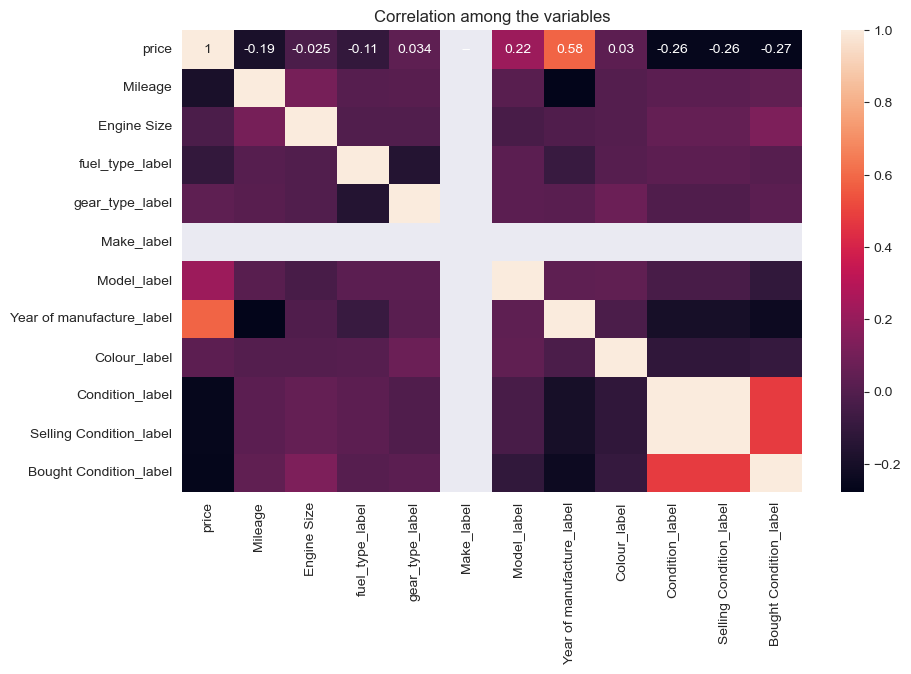

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True).set_title('Correlation among the variables')

In [23]:
X = df.drop(columns=['price']).values
X

array([[2.51732e+05, 1.80000e+03, 3.00000e+00, ..., 2.00000e+00,
        2.00000e+00, 2.00000e+00],
       [1.59726e+05, 3.00000e+03, 3.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.28048e+05, 2.50000e+03, 3.00000e+00, ..., 2.00000e+00,
        2.00000e+00, 1.00000e+00],
       ...,
       [2.82769e+05, 2.00000e+03, 3.00000e+00, ..., 2.00000e+00,
        2.00000e+00, 1.00000e+00],
       [2.34354e+05, 2.20000e+03, 3.00000e+00, ..., 2.00000e+00,
        2.00000e+00, 2.00000e+00],
       [3.45926e+05, 2.00000e+03, 3.00000e+00, ..., 2.00000e+00,
        2.00000e+00, 2.00000e+00]])

In [24]:
y = df[['price']].values
y

array([[2812500],
       [3885000],
       [3432000],
       ...,
       [1924000],
       [1155000],
       [1260000]], dtype=int64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

## Design Goal
This model is mainly interested in accuracy, hence the model eveluation is based on its accuracy.

### Select optimal hyperparameters to give best accuracy for the selected models

In [26]:
models = [

    DecisionTreeRegressor(),
#     RandomForestRegressor(),
    ExtraTreesRegressor(),
    KNeighborsRegressor()
]

In [27]:
model_hyperparameters = {
    'dec_tree_hyp' : {
#         'n_estimators' : [2, 4, 6, 8, 10],
        'max_depth' : [2,4,6,8,10]
    },
    'extra_forest_hyp' : {
        'n_estimators' : [2, 4, 6, 8, 10],
        'max_depth' : [8,10,15,20]
    },
    'KNN_hyp' : {
        'n_neighbors' : [10, 20, 30]
    }
}

In [28]:
model_keys= list(model_hyperparameters.keys())
print(model_keys)

['dec_tree_hyp', 'extra_forest_hyp', 'KNN_hyp']


In [29]:
def model_selection(list_of_models,hyperparametrs_dictionary):
    
    result = []
    i = 0
    
    for model in list_of_models:
        key = model_keys[i]
        params = hyperparametrs_dictionary[key]
        i+=1
        
        print(model)
        print(params)
        print('---------------------------------------------')
        
        classifier = GridSearchCV(model, params, cv=5, scoring='r2')
        
        # fitting the data to classifier
        
        classifier.fit(X,y.ravel())
        result.append({
            'model used': model,
            'highest score' : classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
        
    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe

In [30]:
model_selection(models, model_hyperparameters)

DecisionTreeRegressor()
{'max_depth': [2, 4, 6, 8, 10]}
---------------------------------------------
ExtraTreesRegressor()
{'n_estimators': [2, 4, 6, 8, 10], 'max_depth': [8, 10, 15, 20]}
---------------------------------------------
KNeighborsRegressor()
{'n_neighbors': [10, 20, 30]}
---------------------------------------------


,model used,highest score,best hyperparameters
0,DecisionTreeRegressor(),0.540416,{'max_depth': 6}
1,ExtraTreesRegressor(),0.629712,"{'max_depth': 10, 'n_estimators': 8}"
2,KNeighborsRegressor(),-0.054626,{'n_neighbors': 20}


### Using DecisionTreeRegressor

In [31]:
dtr = DecisionTreeRegressor(max_depth = 10)

#### Using GridSearchCV to improve decision tree generalization ability

In [32]:
grid_values = {'max_depth': [5, 6, 8, 10]}

In [33]:
grid_clf_acc = GridSearchCV(dtr, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=10),
             param_grid={'max_depth': [5, 6, 8, 10]})

In [34]:
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 5}
Grid best score (accuracy):  0.5424610791625069


In [35]:
# alternative metric to optimize over grid parameters: R2_score
grid_clf_r2 = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2')
grid_clf_r2.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_r2.predict(X_test) 


In [36]:
print('Grid best parameter (max. r2): ', grid_clf_r2.best_params_)
print('Grid best score (r2): ', grid_clf_r2.best_score_)

Grid best parameter (max. r2):  {'max_depth': 6}
Grid best score (r2):  0.5869776381890983


In [37]:
print('R-squared test score: {:.3f}'
     .format(grid_clf_r2.score(X_test, y_test)))

R-squared test score: 0.680


In [38]:
print('R-squared test score: {:.3f}'
     .format(grid_clf_r2.score(X_train, y_train)))

R-squared test score: 0.873


#### Using decision tree directly

In [39]:
dtr.fit(X_train, y_train.ravel())

DecisionTreeRegressor(max_depth=10)

In [40]:
dtr_pred = dtr.predict(X_test)

In [41]:
print('R-squared test score: {:.3f}'
     .format(dtr.score(X_test, y_test)))

R-squared test score: 0.832


In [42]:
print('R-squared test score: {:.3f}'
     .format(dtr.score(X_train, y_train)))

R-squared test score: 0.983


## Using ExtraTreesRegressor

In [43]:
etr = ExtraTreesRegressor(max_depth=10, n_estimators=8).fit(X_train, y_train.ravel())

In [44]:
etr_pred = etr.predict(X_test)

In [45]:
print('R-squared test score: {:.3f}'
     .format(etr.score(X_test, y_test)))

R-squared test score: 0.843


In [46]:
print('R-squared test score: {:.3f}'
     .format(etr.score(X_train, y_train)))

R-squared test score: 0.973
